<a href="https://colab.research.google.com/github/BSteiner1/Adversarial-Examples/blob/main/Notebooks/FashionMNISTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# class Generator(nn.Module):
#     def __init__(self, latent_dim):
#         super(Generator, self).__init__()

#         self.latent_dim = latent_dim

#         # Project the noise vector into a representation suitable for upsampling
#         self.fc1 = nn.Linear(latent_dim, 128 * 7 * 7)
#         self.fc2 = nn.Linear(3136, 800)
#         self.fc3 = nn.Linear(800, 784)

#         self.relu = nn.ReLU()

#         # Upsample the representation to generate the output image
#         self.conv_transpose = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 16, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),
#             nn.Tanh()  # Output image will be in range [-1, 1], suitable for most image datasets
#         )

#     def forward(self, x):
#         # Project the noise vector into a representation suitable for upsampling
#         x = self.fc1(x)
#         x = x.view(batch_size, 128, 7, 7)  # Reshape to (batch_size, channels, height, width)
#         #print("hi", x.shape)

#         # Upsample the representation to generate the output image
#         x = self.conv_transpose(x)

#         x = torch.flatten(x, start_dim=1)
#         #print("conv", x.shape)
#         x = self.fc2(x)
#         #print("fc2", x.shape)
#         x = self.relu(x)
#         x = self.fc3(x)
#         #print("fc3", x.shape)
#         x = torch.tanh(x)

#         return x

In [ ]:
class MLPGenerator(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLPGenerator, self).__init__()

        # Add 3 fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.fc4 = nn.Linear(600, output_size)

        # activation
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        #x = self.relu(x)
        #x = self.fc4(x)
        x = torch.tanh(x)

        return x

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Discriminator, self).__init__()

        # Add 3 fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

        # activation
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)

        return x

In [ ]:
batch_size = 256

In [ ]:
# Load Fashion MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
lr = 0.0001
epochs = 50
input_size = 100
output_size = 784

In [ ]:
generator = MLPGenerator(input_size, 256, 400, 784)
discriminator = Discriminator(output_size, 400, 256, 1)

In [ ]:
criterion = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

Epoch [1/50], Step [200/234], d_loss: 0.3432, g_loss: 1.9422
Epoch 1/50, D Loss: 0.11663134768605232, G Loss: 2.939710855484009


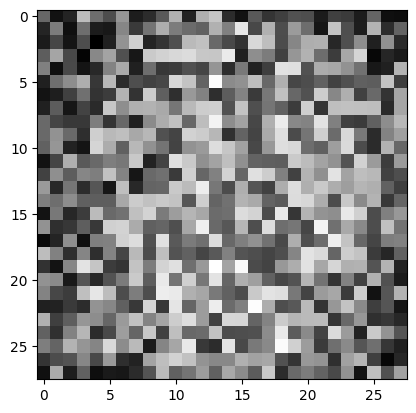

Epoch [2/50], Step [200/234], d_loss: 0.1165, g_loss: 3.3505
Epoch 2/50, D Loss: 0.06024860218167305, G Loss: 3.731590747833252


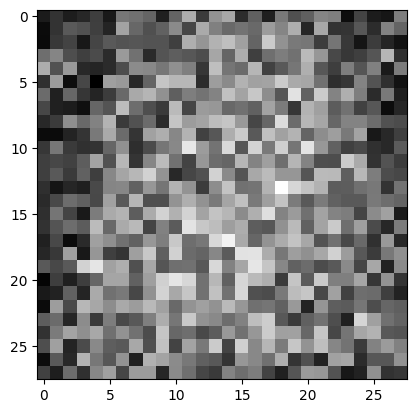

Epoch [3/50], Step [200/234], d_loss: 0.0924, g_loss: 3.4619
Epoch 3/50, D Loss: 0.08271556720137596, G Loss: 3.624661684036255


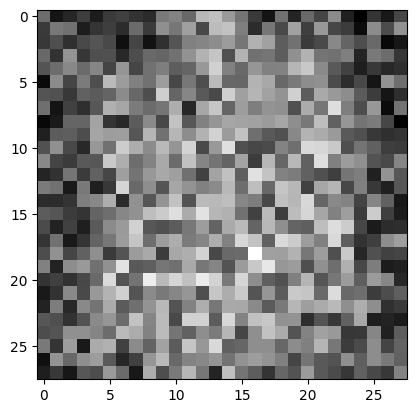

Epoch [4/50], Step [200/234], d_loss: 0.0841, g_loss: 3.5497
Epoch 4/50, D Loss: 0.05790076032280922, G Loss: 3.8116886615753174


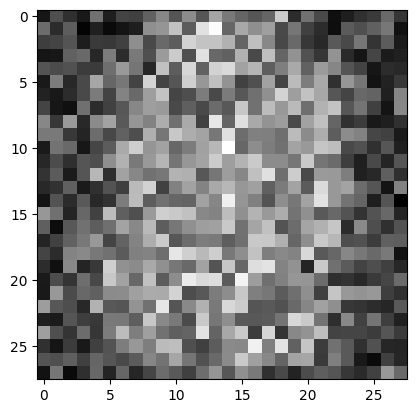

Epoch [5/50], Step [200/234], d_loss: 0.0493, g_loss: 4.6851
Epoch 5/50, D Loss: 0.04437048174440861, G Loss: 4.527152061462402


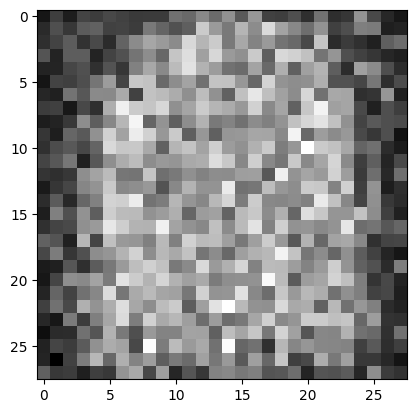

Epoch [6/50], Step [200/234], d_loss: 0.0319, g_loss: 5.1480
Epoch 6/50, D Loss: 0.018824027851223946, G Loss: 5.04019832611084


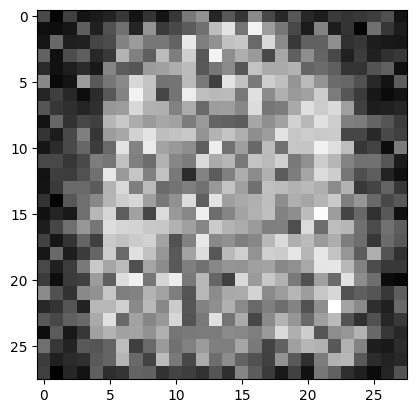

Epoch [7/50], Step [200/234], d_loss: 0.0381, g_loss: 5.2361
Epoch 7/50, D Loss: 0.030658402014523745, G Loss: 4.961010932922363


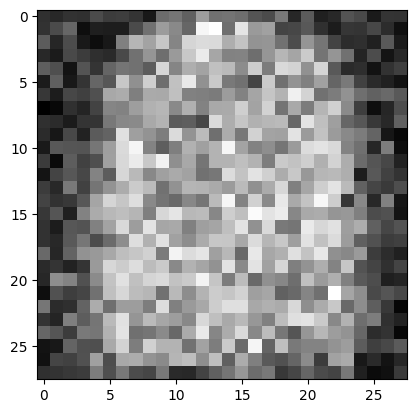

Epoch [8/50], Step [200/234], d_loss: 0.0557, g_loss: 5.1106
Epoch 8/50, D Loss: 0.04194096475839615, G Loss: 4.668498992919922


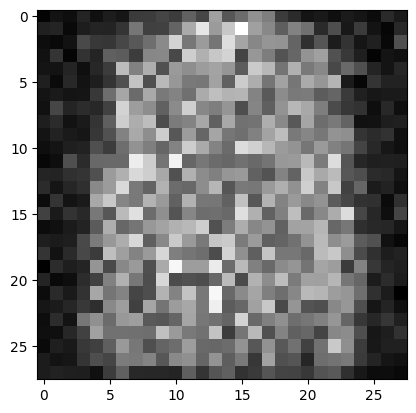

Epoch [9/50], Step [200/234], d_loss: 0.0287, g_loss: 5.2107
Epoch 9/50, D Loss: 0.012267794460058212, G Loss: 5.89497184753418


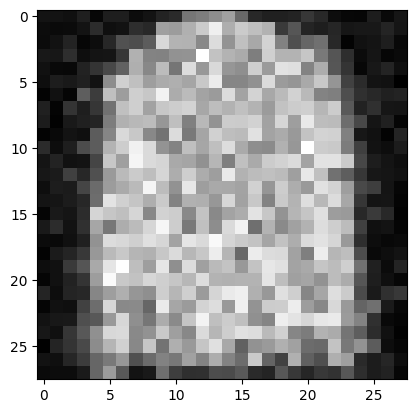

Epoch [10/50], Step [200/234], d_loss: 0.0251, g_loss: 5.4931
Epoch 10/50, D Loss: 0.05924156866967678, G Loss: 4.2116007804870605


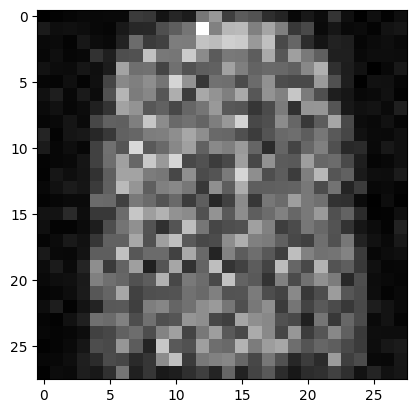

Epoch [11/50], Step [200/234], d_loss: 0.0283, g_loss: 6.2275
Epoch 11/50, D Loss: 0.04472711682319641, G Loss: 5.27567195892334


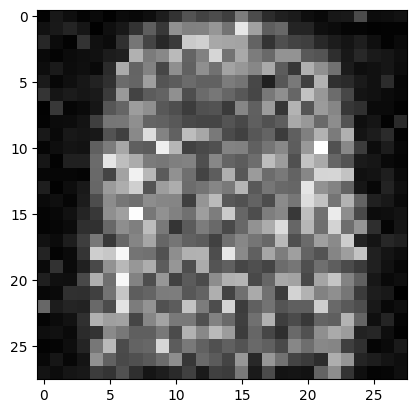

Epoch [12/50], Step [200/234], d_loss: 0.0342, g_loss: 5.4220
Epoch 12/50, D Loss: 0.04916517063975334, G Loss: 4.224477291107178


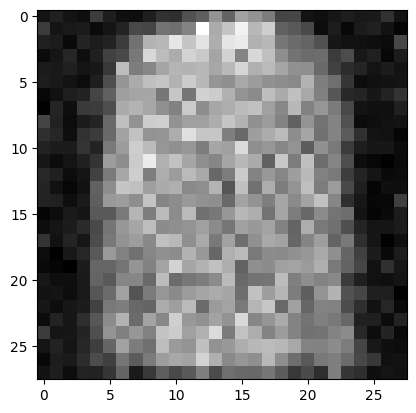

Epoch [13/50], Step [200/234], d_loss: 0.0224, g_loss: 6.2694
Epoch 13/50, D Loss: 0.057895295321941376, G Loss: 4.561249732971191


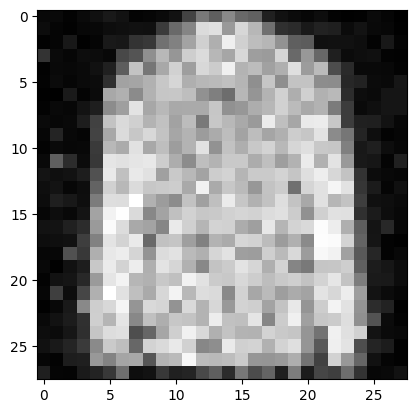

Epoch [14/50], Step [200/234], d_loss: 0.0599, g_loss: 5.3633
Epoch 14/50, D Loss: 0.05693499464541674, G Loss: 5.348985195159912


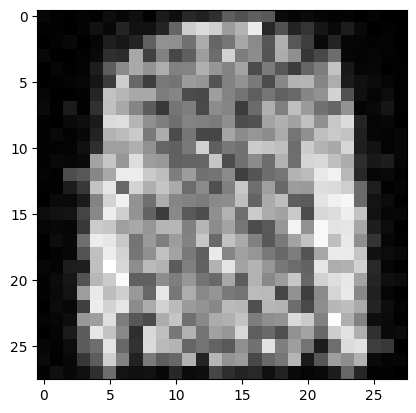

Epoch [15/50], Step [200/234], d_loss: 0.0206, g_loss: 6.9979
Epoch 15/50, D Loss: 0.08225113898515701, G Loss: 4.643035888671875


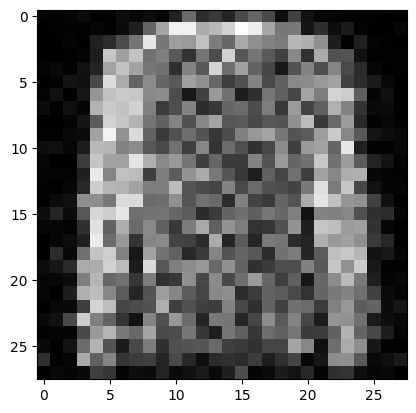

Epoch [16/50], Step [200/234], d_loss: 0.0412, g_loss: 6.1042
Epoch 16/50, D Loss: 0.0659938845783472, G Loss: 5.717240810394287


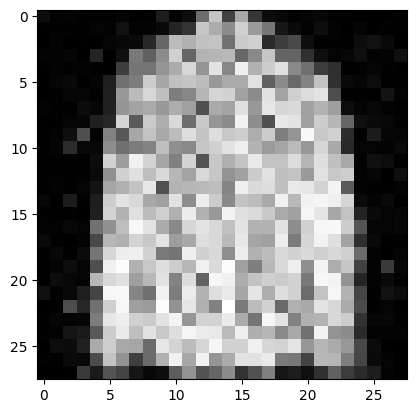

Epoch [17/50], Step [200/234], d_loss: 0.0264, g_loss: 5.7431
Epoch 17/50, D Loss: 0.0766074787825346, G Loss: 6.13562536239624


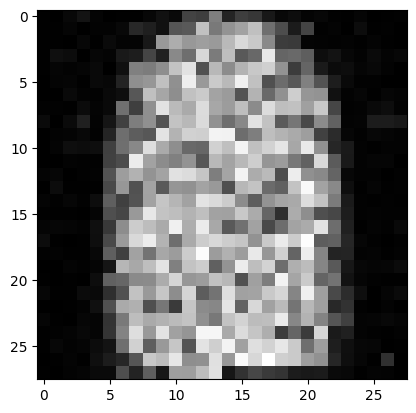

Epoch [18/50], Step [200/234], d_loss: 0.0448, g_loss: 6.7673
Epoch 18/50, D Loss: 0.01756215700879693, G Loss: 5.751465797424316


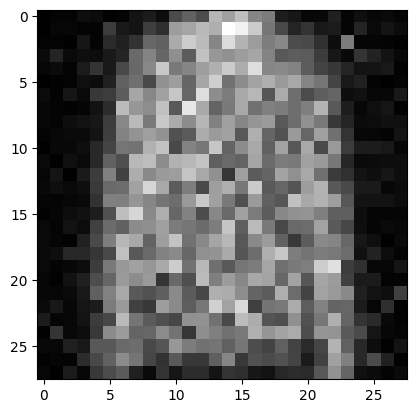

Epoch [19/50], Step [200/234], d_loss: 0.0631, g_loss: 6.8414
Epoch 19/50, D Loss: 0.045186758041381836, G Loss: 6.360310077667236


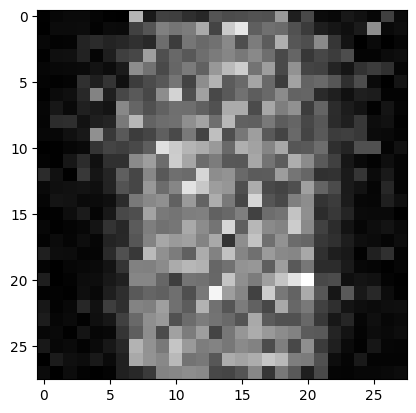

Epoch [20/50], Step [200/234], d_loss: 0.0266, g_loss: 5.5084
Epoch 20/50, D Loss: 0.142001673579216, G Loss: 5.657752513885498


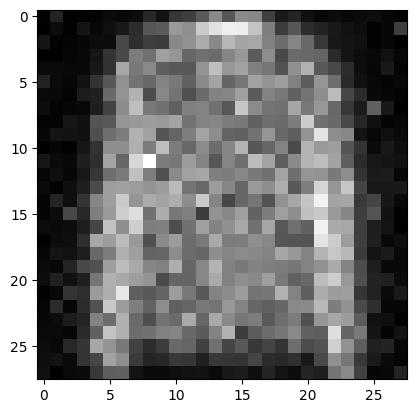

Epoch [21/50], Step [200/234], d_loss: 0.0936, g_loss: 4.9123
Epoch 21/50, D Loss: 0.10442196298390627, G Loss: 6.1565351486206055


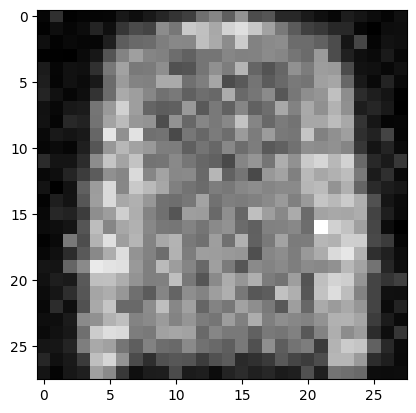

Epoch [22/50], Step [200/234], d_loss: 0.0846, g_loss: 6.5868
Epoch 22/50, D Loss: 0.11178944259881973, G Loss: 4.071816444396973


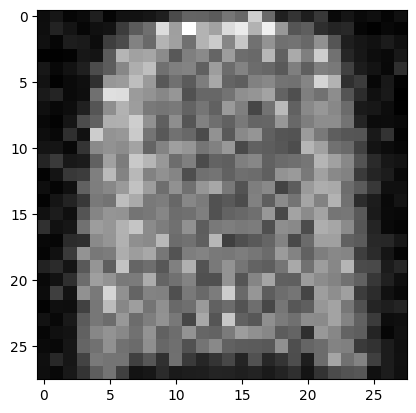

Epoch [23/50], Step [200/234], d_loss: 0.1044, g_loss: 5.1506
Epoch 23/50, D Loss: 0.08172622323036194, G Loss: 5.822329998016357


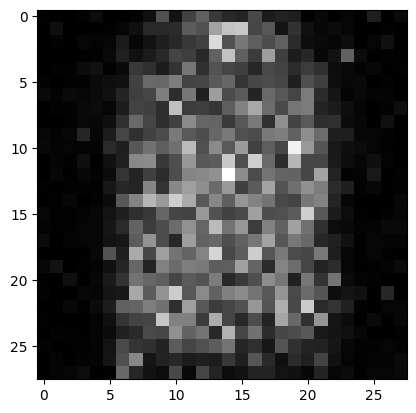

Epoch [24/50], Step [200/234], d_loss: 0.2315, g_loss: 7.3136
Epoch 24/50, D Loss: 0.05257011763751507, G Loss: 6.2278056144714355


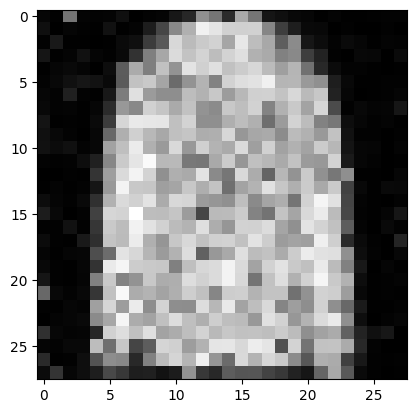

KeyboardInterrupt: 

In [ ]:
# Training loop
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.view(-1, 784)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        #print("here", fake_labels.shape)

        # Train Discriminator
        discriminator.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        z = torch.randn(batch_size, input_size)
        #print("z", z.shape)
        fake_images = generator(z)
        #print("fake", fake_images.shape)
        outputs = discriminator(fake_images.detach())
        #print("outputs", outputs.shape)
        #print(fake_labels.shape)
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}'
                  .format(epoch+1, epochs, i+1, len(train_loader),
                          d_loss_real.item() + d_loss_fake.item(), g_loss.item()))


    print(f"Epoch {epoch + 1}/{epochs}, D Loss: {d_loss_real.item() + d_loss_fake.item()}, G Loss: {g_loss.item()}")

    z = torch.randn(1, input_size)
    with torch.no_grad():
        img = generator(z).detach().view(1, 28, 28)
    img = img.squeeze().detach().numpy()
    plt.imshow(img, cmap='gray')
    plt.show()


In [ ]:
num_samples = 10
z = torch.randn(num_samples, input_size)
with torch.no_grad():
    generated_samples = generator(z).detach().view(num_samples, 28, 28)

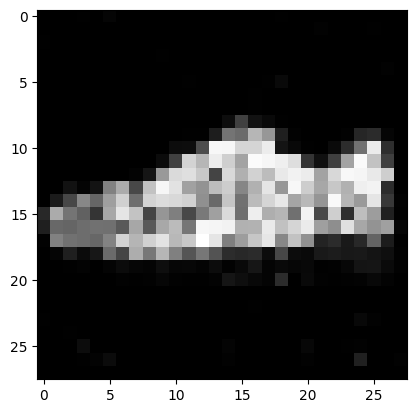

-----------------------------------------------------


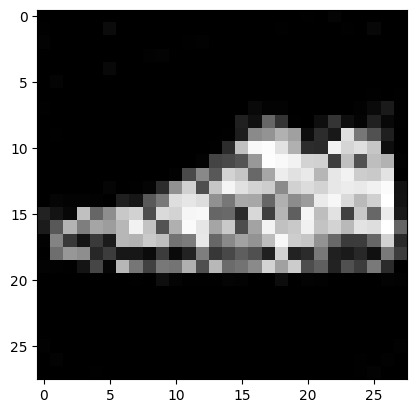

-----------------------------------------------------


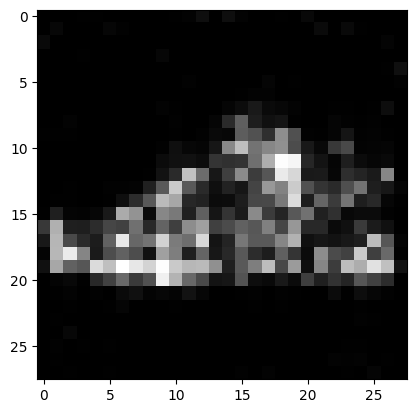

-----------------------------------------------------


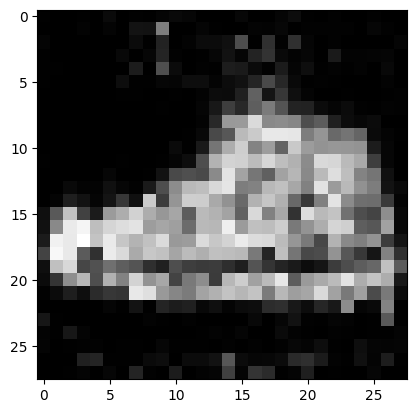

-----------------------------------------------------


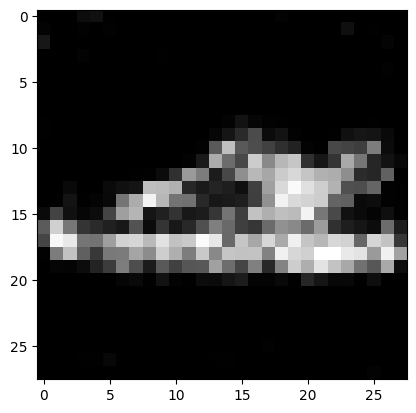

-----------------------------------------------------


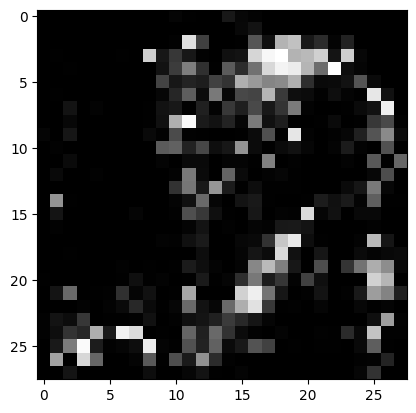

-----------------------------------------------------


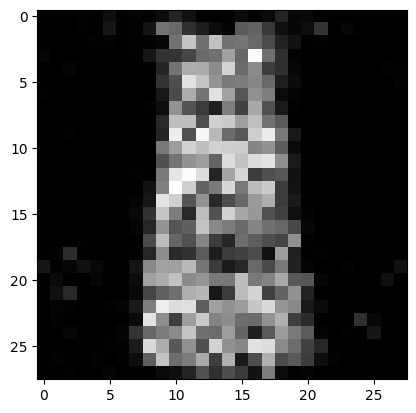

-----------------------------------------------------


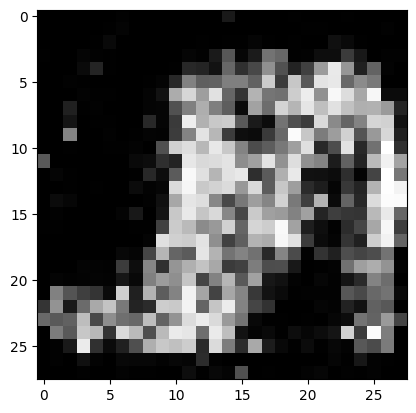

-----------------------------------------------------


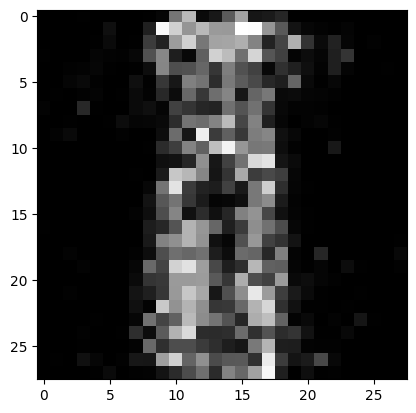

-----------------------------------------------------


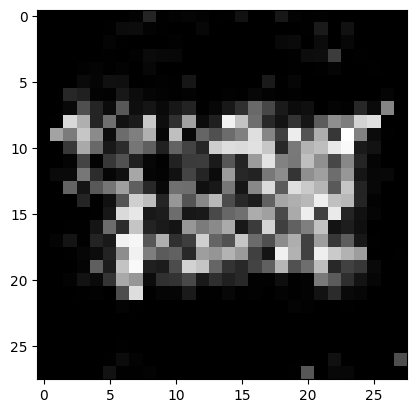

-----------------------------------------------------


In [ ]:
for i in range(10):
  img0 = generated_samples[i]
  img0 = img0.squeeze().detach().numpy()
  plt.imshow(img0, cmap='gray')
  plt.show()
  print("-----------------------------------------------------")